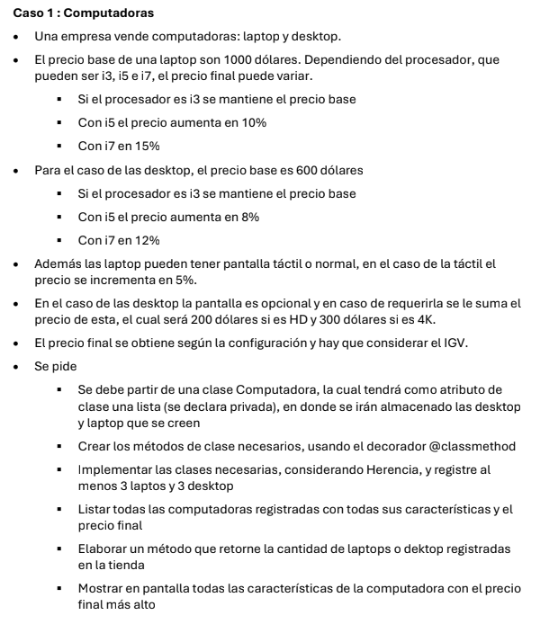

In [4]:
class Computadora:
  def __init__(self, precio_base, tipo_procesador):
    self._PORCENTAJE_IGV = 0.18
    self._precio_base = precio_base
    self._tipo_procesador = tipo_procesador

class Laptop(Computadora):
  def __init__(self, tipo_procesador, tipo_pantalla):
    super().__init__(1000, tipo_procesador)
    self.__tipo_pantalla = tipo_pantalla
    self.__tipo = 'Laptop'
  def obtener_precio(self):
    porcentaje_incremento = 0
    if self._tipo_procesador == 'i5':
      porcentaje_incremento = 0.1
    elif self._tipo_procesador == 'i7':
      porcentaje_incremento = 0.15
    if self.__tipo_pantalla == 'Tactil':
      porcentaje_incremento += 0.05
    precio = self._precio_base + (self._precio_base * porcentaje_incremento)
    return precio + precio * self._PORCENTAJE_IGV
  def __str__(self):
    return f"Tipo: {self.__tipo}\nPrecio Base: {self._precio_base}\nTipo Procesador: {self._tipo_procesador}\nTipo Pantalla: {self.__tipo_pantalla}\nPrecio Total: {self.obtener_precio()}\n"
  def get_tipo(self):
    return self.__tipo

class Desktop(Computadora):
  def __init__(self, tipo_procesador, tiene_monitor, tipo_monitor = None):
    super().__init__(600, tipo_procesador)
    self.__tipo = 'Desktop'
    self.__tiene_monitor = tiene_monitor
    self.__tipo_monitor = tipo_monitor
  def obtener_precio(self):
    porcentaje_incremento = 0
    precio_monitor = 0
    if self._tipo_procesador == 'i5':
      porcentaje_incremento = 0.08
    elif self._tipo_procesador == 'i7':
      porcentaje_incremento = 0.12
    if self.__tiene_monitor == 'Si':
      if self.__tipo_monitor == 'HD':
        precio_monitor = 200
      else:
        precio_monitor = 300
    return (self._precio_base + (self._precio_base * porcentaje_incremento) + precio_monitor) * (1 + self._PORCENTAJE_IGV)
  def __str__(self):
    mensaje = f"Tipo: {self.__tipo}\nPrecio Base: {self._precio_base}\nTipo Procesador: {self._tipo_procesador}\nTiene Pantalla: {self.__tiene_monitor}\n"
    if self.__tiene_monitor == 'Si':
      mensaje += f"Tipo de Pantalla: {self.__tipo_monitor}\n"
    mensaje += f"Precio Total: {self.obtener_precio()}\n"
    return mensaje
  def get_tipo(self):
    return self.__tipo

class Tienda:
  def __init__(self):
    self.__computadoras = []
  def registrar_computadora(self, compu):
    self.__computadoras.append(compu)
  def listar_computadoras(self):
    for compu in self.__computadoras:
      print(compu.__str__())
  def contar_tipos_compus(self):
    cont_lap = cont_desk = 0
    for compu in self.__computadoras:
      if compu.get_tipo() == 'Laptop':
        cont_lap+=1
      else:
        cont_desk+=1
    print("La cantida de laptops es: ", cont_lap)
    print("La cantida de desktop es: ", cont_desk)
  def determinar_computadora_precio_mas_alto(self):
    lista_precios = []
    for compu in self.__computadoras:
      if compu.get_tipo() == 'Desktop':
        lista_precios.append(compu.obtener_precio())
    precio_mas_alto = max(lista_precios)
    for compu in self.__computadoras:
      if compu.get_tipo() == 'Desktop' and compu.obtener_precio() == precio_mas_alto:
        print(compu.__str__())

tienda = Tienda()

tienda.registrar_computadora(Laptop('i7', 'Tactil'))
tienda.registrar_computadora(Laptop('i5', 'Normal'))
tienda.registrar_computadora(Laptop('i7', 'Normal'))
tienda.registrar_computadora(Desktop('i7', 'Si', 'HD'))
tienda.registrar_computadora(Desktop('i5', 'No'))
tienda.registrar_computadora(Desktop('i7', 'Si', '4k'))

tienda.listar_computadoras()
tienda.contar_tipos_compus()
tienda.determinar_computadora_precio_mas_alto()

Tipo: Laptop
Precio Base: 1000
Tipo Procesador: i7
Tipo Pantalla: Tactil
Precio Total: 1416.0

Tipo: Laptop
Precio Base: 1000
Tipo Procesador: i5
Tipo Pantalla: Normal
Precio Total: 1298.0

Tipo: Laptop
Precio Base: 1000
Tipo Procesador: i7
Tipo Pantalla: Normal
Precio Total: 1357.0

Tipo: Desktop
Precio Base: 600
Tipo Procesador: i7
Tiene Pantalla: Si
Tipo de Pantalla: HD
Precio Total: 1028.96

Tipo: Desktop
Precio Base: 600
Tipo Procesador: i5
Tiene Pantalla: No
Precio Total: 764.64

Tipo: Desktop
Precio Base: 600
Tipo Procesador: i7
Tiene Pantalla: Si
Tipo de Pantalla: 4k
Precio Total: 1146.96

La cantida de laptops es:  3
La cantida de desktop es:  3
Tipo: Desktop
Precio Base: 600
Tipo Procesador: i7
Tiene Pantalla: Si
Tipo de Pantalla: 4k
Precio Total: 1146.96



In [7]:
class Computadora:
  __computadoras = []
  def __init__(self, precio_base, tipo_procesador):
    self._PORCENTAJE_IGV = 0.18
    self._precio_base = precio_base
    self._tipo_procesador = tipo_procesador

  @classmethod
  def registrar_computadora(self, compu):
    self.__computadoras.append(compu)

  @classmethod
  def listar_computadoras(self):
    for compu in self.__computadoras:
      print(compu.__str__())

  @classmethod
  def contar_tipos_compus(self):
    cont_lap = cont_desk = 0
    for compu in self.__computadoras:
      if compu.get_tipo() == 'Laptop':
        cont_lap+=1
      else:
        cont_desk+=1
    print("La cantida de laptops es: ", cont_lap)
    print("La cantida de desktop es: ", cont_desk)

  @classmethod
  def determinar_computadora_precio_mas_alto(self):
    lista_precios = []
    for compu in self.__computadoras:
      if compu.get_tipo() == 'Desktop':
        lista_precios.append(compu.obtener_precio())
    precio_mas_alto = max(lista_precios)
    for compu in self.__computadoras:
      if compu.get_tipo() == 'Desktop' and compu.obtener_precio() == precio_mas_alto:
        print(compu.__str__())

class Laptop(Computadora):
  def __init__(self, tipo_procesador, tipo_pantalla):
    super().__init__(1000, tipo_procesador)
    self.__tipo_pantalla = tipo_pantalla
    self.__tipo = 'Laptop'
  def obtener_precio(self):
    porcentaje_incremento = 0
    if self._tipo_procesador == 'i5':
      porcentaje_incremento = 0.1
    elif self._tipo_procesador == 'i7':
      porcentaje_incremento = 0.15
    if self.__tipo_pantalla == 'Tactil':
      porcentaje_incremento += 0.05
    precio = self._precio_base + (self._precio_base * porcentaje_incremento)
    return precio + precio * self._PORCENTAJE_IGV
  def __str__(self):
    return f"Tipo: {self.__tipo}\nPrecio Base: {self._precio_base}\nTipo Procesador: {self._tipo_procesador}\nTipo Pantalla: {self.__tipo_pantalla}\nPrecio Total: {self.obtener_precio()}\n"
  def get_tipo(self):
    return self.__tipo

class Desktop(Computadora):
  def __init__(self, tipo_procesador, tiene_monitor, tipo_monitor = None):
    super().__init__(600, tipo_procesador)
    self.__tipo = 'Desktop'
    self.__tiene_monitor = tiene_monitor
    self.__tipo_monitor = tipo_monitor
  def obtener_precio(self):
    porcentaje_incremento = 0
    precio_monitor = 0
    if self._tipo_procesador == 'i5':
      porcentaje_incremento = 0.08
    elif self._tipo_procesador == 'i7':
      porcentaje_incremento = 0.12
    if self.__tiene_monitor == 'Si':
      if self.__tipo_monitor == 'HD':
        precio_monitor = 200
      else:
        precio_monitor = 300
    return (self._precio_base + (self._precio_base * porcentaje_incremento) + precio_monitor) * (1 + self._PORCENTAJE_IGV)
  def __str__(self):
    mensaje = f"Tipo: {self.__tipo}\nPrecio Base: {self._precio_base}\nTipo Procesador: {self._tipo_procesador}\nTiene Pantalla: {self.__tiene_monitor}\n"
    if self.__tiene_monitor == 'Si':
      mensaje += f"Tipo de Pantalla: {self.__tipo_monitor}\n"
    mensaje += f"Precio Total: {self.obtener_precio()}\n"
    return mensaje
  def get_tipo(self):
    return self.__tipo

Computadora.registrar_computadora(Laptop('i7', 'Tactil'))
Computadora.registrar_computadora(Laptop('i5', 'Normal'))
Computadora.registrar_computadora(Laptop('i7', 'Normal'))
Computadora.registrar_computadora(Desktop('i7', 'Si', 'HD'))
Computadora.registrar_computadora(Desktop('i5', 'No'))
Computadora.registrar_computadora(Desktop('i7', 'Si', '4k'))

Computadora.listar_computadoras()
Computadora.contar_tipos_compus()
Computadora.determinar_computadora_precio_mas_alto()

Tipo: Laptop
Precio Base: 1000
Tipo Procesador: i7
Tipo Pantalla: Tactil
Precio Total: 1416.0

Tipo: Laptop
Precio Base: 1000
Tipo Procesador: i5
Tipo Pantalla: Normal
Precio Total: 1298.0

Tipo: Laptop
Precio Base: 1000
Tipo Procesador: i7
Tipo Pantalla: Normal
Precio Total: 1357.0

Tipo: Desktop
Precio Base: 600
Tipo Procesador: i7
Tiene Pantalla: Si
Tipo de Pantalla: HD
Precio Total: 1028.96

Tipo: Desktop
Precio Base: 600
Tipo Procesador: i5
Tiene Pantalla: No
Precio Total: 764.64

Tipo: Desktop
Precio Base: 600
Tipo Procesador: i7
Tiene Pantalla: Si
Tipo de Pantalla: 4k
Precio Total: 1146.96

La cantida de laptops es:  3
La cantida de desktop es:  3
Tipo: Desktop
Precio Base: 600
Tipo Procesador: i7
Tiene Pantalla: Si
Tipo de Pantalla: 4k
Precio Total: 1146.96



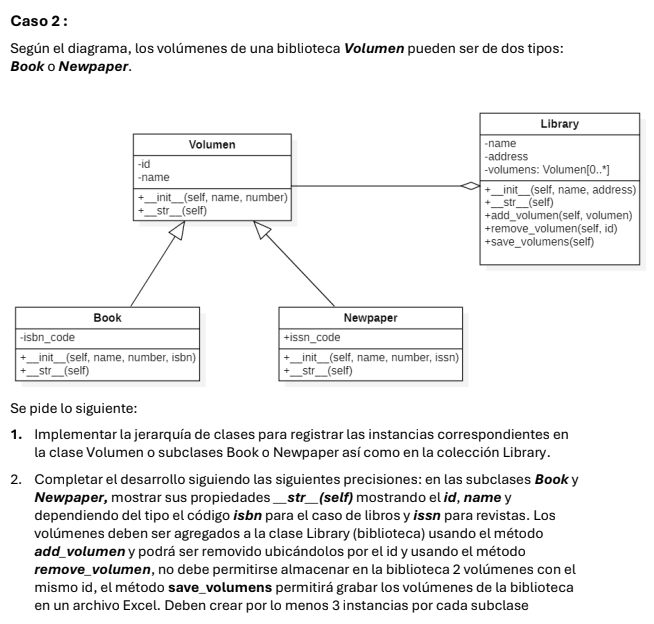

In [11]:
import pandas as pd

class Volumen:
  def __init__(self, name, number):
    self._name = name
    self._number = number
  def get_name(self):
    return self._name
  def get_number(self):
    return self._number
class Book(Volumen):
  def __init__(self, name, number, isbn):
    super().__init__(name, number)
    self.__isbn_code = isbn
  def __str__(self):
    print(f"ISBN: {self.__isbn_code}\nNombre: {self._name}")
  def get_id(self):
    return self.__isbn_code
class Newpaper(Volumen):
  def __init__(self, name, number, issn):
    super().__init__(name, number)
    self.__issn_code = issn
  def __str__(self):
    print(f"ISSN: {self.__issn_code}\nNombre: {self._name}")
  def get_id(self):
    return self.__issn_code
class Library:
  def __init__(self, name, address):
    self.__name = name
    self.__address = address
    self.__volumens = []
  def comprobar_id(self, id):
    for volumen in self.__volumens:
      if volumen.get_id() == id:
        return True
    return False
  def add_volumen(self, volumen):
    if not self.comprobar_id(volumen.get_id()):
      self.__volumens.append(volumen)
    else:
      print("No puedes registrar dos volumenes con el mismo ID")
  def remove_volumen(self, id):
    for i in range(len(self.__volumens)):
      if self.__volumens[i].get_id() == id:
        self.__volumens.pop(i)
        break;
  def list_volumens(self):
    for volumen in self.__volumens:
      volumen.__str__()
  def save_volumens(self):
    ids = []
    nombres = []
    numeros = []
    for volumen in self.__volumens:
        ids.append(volumen.get_id())
        nombres.append(volumen.get_name())
        numeros.append(volumen.get_number())
    volumenes = {
        "ID": ids,
        "Nombre": nombres,
        "Numeros": numeros
    }
    df = pd.DataFrame(volumenes)
    df.to_excel("datos.xlsx")

bibliotaca = Library("SBS", "Lima")

bibliotaca.add_volumen(Newpaper("AAAA", 123, 'AAAA123'))
bibliotaca.add_volumen(Newpaper("BBBB", 123, 'BBBB123'))
bibliotaca.add_volumen(Newpaper("AAAA", 123, 'AAAA123'))
bibliotaca.add_volumen(Book("Principito", 123, 'Principito123'))
bibliotaca.add_volumen(Book("Principito1", 123, 'Principito124'))
bibliotaca.add_volumen(Book("Principito2", 123, 'Principito125'))

bibliotaca.remove_volumen("Principito125")
bibliotaca.list_volumens()
bibliotaca.save_volumens()

No puedes registrar dos volumenes con el mismo ID
ISSN: AAAA123
Nombre: AAAA
ISSN: BBBB123
Nombre: BBBB
ISBN: Principito123
Nombre: Principito
ISBN: Principito124
Nombre: Principito1
